In [1]:
import tensorflow as tf
from matplotlib import pyplot
import numpy as np
import os
import json

In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory("data-150x150",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(150, 150),
  batch_size=32)

Found 39698 files belonging to 4 classes.
Using 31759 files for training.


In [3]:
val_ds = tf.keras.utils.image_dataset_from_directory("data-150x150",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(150, 150),
  batch_size=32)

Found 39698 files belonging to 4 classes.
Using 7939 files for validation.


In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [5]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [6]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal", input_shape=(150,150,3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
    tf.keras.layers.RandomCrop(135, 135) #height, width
  ]
)

In [7]:
num_classes = 4
models = {}

In [8]:
models["CNN"] = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [9]:
models["MLP"] = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Flatten(input_shape=(150, 150, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [10]:
for model in models.values():
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
for model in models.values():
    model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 135, 135, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 135, 135, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 135, 135, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 67, 67, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 67, 67, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 33, 33, 32)       0         
 2D)                                                  

In [12]:
epochs=200
histories = {}

In [13]:
for name in models:
    print("\nTraining "+name+":")
    model_path = os.path.join("saved_models/", name+".h5")
    history_path = os.path.join("saved_histories", name+".json")
    histories[name] = models[name].fit(
      train_ds,
      validation_data=val_ds,
      epochs=epochs,
    )
    models[name].save(model_path)
    json.dump(histories[name].history, open(history_path, 'w'))
    print("")


Training CNN:
Epoch 1/200
993/993 [==============================] - 39s 26ms/step - loss: 1.0081 - accuracy: 0.5530 - val_loss: 0.7765 - val_accuracy: 0.6822
Epoch 2/200
993/993 [==============================] - 26s 26ms/step - loss: 0.7325 - accuracy: 0.6996 - val_loss: 0.6493 - val_accuracy: 0.7488
Epoch 3/200
993/993 [==============================] - 27s 27ms/step - loss: 0.6231 - accuracy: 0.7488 - val_loss: 0.5620 - val_accuracy: 0.7881
Epoch 4/200
993/993 [==============================] - 25s 25ms/step - loss: 0.5573 - accuracy: 0.7813 - val_loss: 0.5442 - val_accuracy: 0.8007
Epoch 5/200
993/993 [==============================] - 24s 24ms/step - loss: 0.5049 - accuracy: 0.8044 - val_loss: 0.4769 - val_accuracy: 0.8260
Epoch 6/200
993/993 [==============================] - 24s 24ms/step - loss: 0.4623 - accuracy: 0.8252 - val_loss: 0.4357 - val_accuracy: 0.8439
Epoch 7/200
993/993 [==============================] - 25s 25ms/step - loss: 0.4422 - accuracy: 0.8327 - val_loss: 

993/993 [==============================] - 24s 24ms/step - loss: 0.2163 - accuracy: 0.9200 - val_loss: 0.2805 - val_accuracy: 0.9074
Epoch 58/200
993/993 [==============================] - 24s 24ms/step - loss: 0.2192 - accuracy: 0.9183 - val_loss: 0.2841 - val_accuracy: 0.9033
Epoch 59/200
993/993 [==============================] - 24s 24ms/step - loss: 0.2182 - accuracy: 0.9215 - val_loss: 0.2716 - val_accuracy: 0.9103
Epoch 60/200
993/993 [==============================] - 25s 25ms/step - loss: 0.2170 - accuracy: 0.9204 - val_loss: 0.2845 - val_accuracy: 0.9009
Epoch 61/200
993/993 [==============================] - 24s 24ms/step - loss: 0.2135 - accuracy: 0.9216 - val_loss: 0.2747 - val_accuracy: 0.9065
Epoch 62/200
993/993 [==============================] - 24s 24ms/step - loss: 0.2135 - accuracy: 0.9209 - val_loss: 0.2839 - val_accuracy: 0.9040
Epoch 63/200
993/993 [==============================] - 24s 24ms/step - loss: 0.2112 - accuracy: 0.9205 - val_loss: 0.3035 - val_accuracy

993/993 [==============================] - 24s 24ms/step - loss: 0.1740 - accuracy: 0.9365 - val_loss: 0.2680 - val_accuracy: 0.9147
Epoch 114/200
993/993 [==============================] - 24s 24ms/step - loss: 0.1728 - accuracy: 0.9360 - val_loss: 0.2840 - val_accuracy: 0.9109
Epoch 115/200
993/993 [==============================] - 24s 24ms/step - loss: 0.1738 - accuracy: 0.9349 - val_loss: 0.2684 - val_accuracy: 0.9107
Epoch 116/200
993/993 [==============================] - 25s 25ms/step - loss: 0.1698 - accuracy: 0.9370 - val_loss: 0.2700 - val_accuracy: 0.9130
Epoch 117/200
993/993 [==============================] - 25s 25ms/step - loss: 0.1707 - accuracy: 0.9370 - val_loss: 0.2667 - val_accuracy: 0.9154
Epoch 118/200
993/993 [==============================] - 25s 25ms/step - loss: 0.1742 - accuracy: 0.9360 - val_loss: 0.2925 - val_accuracy: 0.9059
Epoch 119/200
993/993 [==============================] - 25s 25ms/step - loss: 0.1711 - accuracy: 0.9365 - val_loss: 0.2910 - val_ac

Epoch 169/200
993/993 [==============================] - 24s 24ms/step - loss: 0.1493 - accuracy: 0.9455 - val_loss: 0.2732 - val_accuracy: 0.9199
Epoch 170/200
993/993 [==============================] - 24s 24ms/step - loss: 0.1543 - accuracy: 0.9424 - val_loss: 0.2601 - val_accuracy: 0.9188
Epoch 171/200
993/993 [==============================] - 24s 24ms/step - loss: 0.1501 - accuracy: 0.9439 - val_loss: 0.2689 - val_accuracy: 0.9186
Epoch 172/200
993/993 [==============================] - 24s 24ms/step - loss: 0.1512 - accuracy: 0.9442 - val_loss: 0.2832 - val_accuracy: 0.9146
Epoch 173/200
993/993 [==============================] - 24s 24ms/step - loss: 0.1511 - accuracy: 0.9433 - val_loss: 0.2724 - val_accuracy: 0.9152
Epoch 174/200
993/993 [==============================] - 24s 24ms/step - loss: 0.1535 - accuracy: 0.9433 - val_loss: 0.2515 - val_accuracy: 0.9219
Epoch 175/200
993/993 [==============================] - 24s 24ms/step - loss: 0.1521 - accuracy: 0.9446 - val_loss: 0

Epoch 25/200
993/993 [==============================] - 13s 13ms/step - loss: 1.3864 - accuracy: 0.2479 - val_loss: 1.3868 - val_accuracy: 0.2422
Epoch 26/200
993/993 [==============================] - 13s 13ms/step - loss: 1.3864 - accuracy: 0.2497 - val_loss: 1.3864 - val_accuracy: 0.2470
Epoch 27/200
993/993 [==============================] - 13s 13ms/step - loss: 1.3864 - accuracy: 0.2510 - val_loss: 1.3863 - val_accuracy: 0.2422
Epoch 28/200
993/993 [==============================] - 12s 13ms/step - loss: 1.3864 - accuracy: 0.2486 - val_loss: 1.3866 - val_accuracy: 0.2422
Epoch 29/200
993/993 [==============================] - 12s 12ms/step - loss: 1.3864 - accuracy: 0.2482 - val_loss: 1.3867 - val_accuracy: 0.2470
Epoch 30/200
993/993 [==============================] - 12s 12ms/step - loss: 1.3864 - accuracy: 0.2517 - val_loss: 1.3866 - val_accuracy: 0.2422
Epoch 31/200
993/993 [==============================] - 12s 12ms/step - loss: 1.3864 - accuracy: 0.2531 - val_loss: 1.3863 -

993/993 [==============================] - 13s 13ms/step - loss: 1.3864 - accuracy: 0.2473 - val_loss: 1.3864 - val_accuracy: 0.2470
Epoch 82/200
993/993 [==============================] - 13s 13ms/step - loss: 1.3864 - accuracy: 0.2476 - val_loss: 1.3864 - val_accuracy: 0.2470
Epoch 83/200
993/993 [==============================] - 13s 13ms/step - loss: 1.3864 - accuracy: 0.2501 - val_loss: 1.3863 - val_accuracy: 0.2422
Epoch 84/200
993/993 [==============================] - 13s 13ms/step - loss: 1.3864 - accuracy: 0.2485 - val_loss: 1.3867 - val_accuracy: 0.2422
Epoch 85/200
993/993 [==============================] - 13s 13ms/step - loss: 1.3864 - accuracy: 0.2505 - val_loss: 1.3863 - val_accuracy: 0.2539
Epoch 86/200
993/993 [==============================] - 13s 14ms/step - loss: 1.3864 - accuracy: 0.2516 - val_loss: 1.3863 - val_accuracy: 0.2470
Epoch 87/200
993/993 [==============================] - 13s 13ms/step - loss: 1.3864 - accuracy: 0.2473 - val_loss: 1.3865 - val_accuracy

Epoch 137/200
993/993 [==============================] - 13s 13ms/step - loss: 1.3864 - accuracy: 0.2495 - val_loss: 1.3866 - val_accuracy: 0.2470
Epoch 138/200
993/993 [==============================] - 13s 13ms/step - loss: 1.3864 - accuracy: 0.2509 - val_loss: 1.3865 - val_accuracy: 0.2422
Epoch 139/200
993/993 [==============================] - 13s 13ms/step - loss: 1.3864 - accuracy: 0.2529 - val_loss: 1.3863 - val_accuracy: 0.2539
Epoch 140/200
993/993 [==============================] - 13s 13ms/step - loss: 1.3864 - accuracy: 0.2493 - val_loss: 1.3864 - val_accuracy: 0.2470
Epoch 141/200
993/993 [==============================] - 13s 13ms/step - loss: 1.3864 - accuracy: 0.2453 - val_loss: 1.3866 - val_accuracy: 0.2422
Epoch 142/200
993/993 [==============================] - 13s 13ms/step - loss: 1.3928 - accuracy: 0.2476 - val_loss: 1.3865 - val_accuracy: 0.2422
Epoch 143/200
993/993 [==============================] - 13s 13ms/step - loss: 1.3864 - accuracy: 0.2505 - val_loss: 1

Epoch 193/200
993/993 [==============================] - 13s 13ms/step - loss: 1.3864 - accuracy: 0.2478 - val_loss: 1.3866 - val_accuracy: 0.2422
Epoch 194/200
993/993 [==============================] - 13s 13ms/step - loss: 1.3863 - accuracy: 0.2485 - val_loss: 1.3866 - val_accuracy: 0.2539
Epoch 195/200
993/993 [==============================] - 13s 13ms/step - loss: 1.3864 - accuracy: 0.2448 - val_loss: 1.3864 - val_accuracy: 0.2422
Epoch 196/200
993/993 [==============================] - 13s 13ms/step - loss: 1.3864 - accuracy: 0.2480 - val_loss: 1.3867 - val_accuracy: 0.2422
Epoch 197/200
993/993 [==============================] - 13s 13ms/step - loss: 1.3864 - accuracy: 0.2503 - val_loss: 1.3865 - val_accuracy: 0.2422
Epoch 198/200
993/993 [==============================] - 13s 13ms/step - loss: 1.3864 - accuracy: 0.2482 - val_loss: 1.3865 - val_accuracy: 0.2470
Epoch 199/200
993/993 [==============================] - 13s 13ms/step - loss: 1.3864 - accuracy: 0.2501 - val_loss: 1

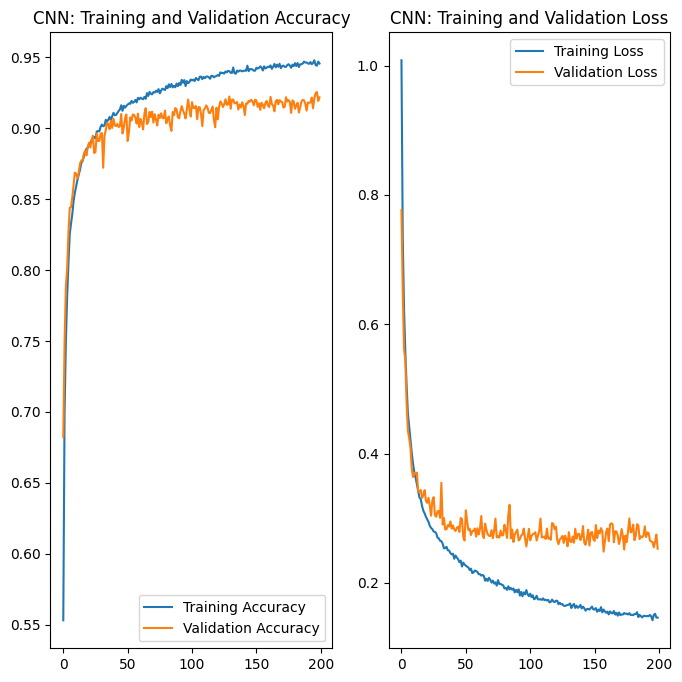

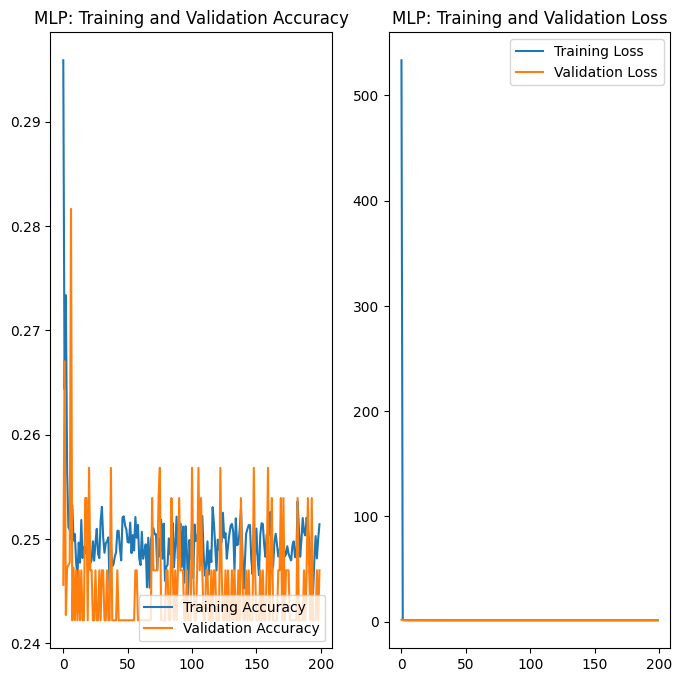

In [14]:
for name in histories:
    history = histories[name]
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    pyplot.figure(figsize=(8, 8))
    pyplot.subplot(1, 2, 1)
    pyplot.plot(epochs_range, acc, label='Training Accuracy')
    pyplot.plot(epochs_range, val_acc, label='Validation Accuracy')
    pyplot.legend(loc='lower right')
    pyplot.title(name+': Training and Validation Accuracy')

    pyplot.subplot(1, 2, 2)
    pyplot.plot(epochs_range, loss, label='Training Loss')
    pyplot.plot(epochs_range, val_loss, label='Validation Loss')
    pyplot.legend(loc='upper right')
    pyplot.title(name+': Training and Validation Loss')
    pyplot.show()

In [15]:
class_names = ["Access Granted", "Access Denied - Please wear a mask over your nose.", "Access Denied - Please wear a mask over your mouth and nose.", "Access Denied - Please wear a mask"]

In [16]:
def predict(file_path):
    
    img = tf.keras.utils.load_img(file_path, target_size=(50, 50))
    pyplot.imshow(img)

    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    
    for name in models:
        model = models[name]
        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])


        print(
            "{} predicts {} ({:.2f}% confidence)"
            .format(name, class_names[np.argmax(score)], 100 * np.max(score))
        )
    pyplot.show()
        


In [17]:
predict("faces/benjamin/1.jpg")

ValueError: in user code:

    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1572, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 150, 150, 3), found shape=(None, 50, 50, 3)


In [ ]:
predict("faces/benjamin/2.jpg")

In [ ]:
predict("faces/benjamin/3.jpg")

In [ ]:
predict("faces/benjamin/4.jpg")

In [ ]:
predict("faces/shaurya/1.jpg")

In [ ]:
predict("faces/shaurya/2.jpg")

In [ ]:
predict("faces/shaurya/3.jpg")

In [ ]:
predict("faces/shaurya/4.jpg")

In [ ]:
predict("faces/zunyi/1.jpg")

In [ ]:
predict("faces/zunyi/2.jpg")

In [ ]:
predict("faces/zunyi/3.jpg")

In [ ]:
predict("faces/zunyi/4.jpg")

In [ ]:
predict("faces/parisa/1.jpg")

In [ ]:
predict("faces/parisa/2.jpg")

In [ ]:
predict("faces/parisa/3.jpg")

## Source: https://www.tensorflow.org/tutorials/images/classification